# Import Packages

In [47]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar




# Upload data 

In [48]:
uscounties = pd.read_csv("/Users/adilarrazolo/Desktop/uscounties.csv")
uscounties['date'] = pd.to_datetime(uscounties['date'])

In [49]:
uscounties

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
790700,2020-12-02,Sweetwater,Wyoming,56037.0,1934,6.0
790701,2020-12-02,Teton,Wyoming,56039.0,1678,2.0
790702,2020-12-02,Uinta,Wyoming,56041.0,1121,4.0
790703,2020-12-02,Washakie,Wyoming,56043.0,486,8.0


In [50]:
uscounties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790705 entries, 0 to 790704
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    790705 non-null  datetime64[ns]
 1   county  790705 non-null  object        
 2   state   790705 non-null  object        
 3   fips    783195 non-null  float64       
 4   cases   790705 non-null  int64         
 5   deaths  774206 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 36.2+ MB


In [54]:
uscounties["day_of_week"] = uscounties['date'].dt.dayofweek
uscounties["month"] = uscounties['date'].dt.month
cal = calendar()
holidays = cal.holidays(start=uscounties['date'].min(), end=uscounties['date'].max())
uscounties['Is_Holiday'] = uscounties['date'].isin(holidays)


In [56]:
uscounties.head()

,date,county,state,fips,cases,deaths,day_of_week,month,Is_Holiday,weekday
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,1,1,False,1
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,2,1,False,2
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,3,1,False,3
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,4,1,False,4
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,4,1,False,4


# Drop unnecesary valiables 

In [37]:
uscounties=uscounties.drop(['county','fips'], axis=1)

In [38]:
uscounties.head()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0.0
1,2020-01-22,Washington,1,0.0
2,2020-01-23,Washington,1,0.0
3,2020-01-24,Illinois,1,0.0
4,2020-01-24,Washington,1,0.0


# Aggregating the data to get the sum total of covid cases in each state 

In [44]:
uscounties.groupby(['state'])[['cases','deaths']].sum().reset_index()

,state,cases,deaths
0,Alabama,23232012,401910.0
1,Alaska,1641900,8243.0
2,Arizona,34499770,824704.0
3,Arkansas,12766981,195657.0
4,California,123532968,2419960.0
5,Colorado,14788544,422228.0
6,Connecticut,12660762,959370.0
7,Delaware,3760759,121162.0
8,District of Columbia,2898111,125200.0
9,Florida,104198772,2044443.0


In [46]:
uscounties.groupby(['date'])[['cases','deaths']].sum().reset_index()

,date,cases,deaths
0,2020-01-21,1,0.0
1,2020-01-22,1,0.0
2,2020-01-23,1,0.0
3,2020-01-24,2,0.0
4,2020-01-25,3,0.0
...,...,...,...
312,2020-11-28,13311031,265940.0
313,2020-11-29,13447344,266758.0
314,2020-11-30,13615103,268023.0
315,2020-12-01,13799397,270633.0


In [57]:
uscounties.groupby(['day_of_week'])[['cases','deaths']].sum().reset_index()

,day_of_week,cases,deaths
0,0,177430440,5365276.0
1,1,179427601,5414537.0
2,2,181544176,5466522.0
3,3,169562160,5237606.0
4,4,171831385,5280981.0
5,5,173816921,5316791.0
6,6,175500185,5338451.0


In [58]:
uscounties.groupby(['month'])[['cases','deaths']].sum().reset_index()

,month,cases,deaths
0,1,41,0.0
1,2,736,1.0
2,3,1095533,20269.0
3,4,19611708,990492.0
4,5,45452114,2695246.0
5,6,65288844,3498937.0
6,7,111626136,4307836.0
7,8,166758521,5259820.0
8,9,199758742,5879775.0
9,10,252793167,6774193.0


In [59]:
uscounties.groupby(['Is_Holiday'])[['cases','deaths']].sum().reset_index()

,Is_Holiday,cases,deaths
0,False,1187016175,36283491.0
1,True,42096693,1136673.0


In [60]:
uscounties.groupby(['county','state'])[['cases','deaths']].sum().reset_index()

,county,state,cases,deaths
0,Abbeville,South Carolina,86117,1787.0
1,Acadia,Louisiana,457623,15286.0
2,Accomack,Virginia,231139,3493.0
3,Ada,Idaho,2065958,21560.0
4,Adair,Iowa,19221,239.0
...,...,...,...,...
3267,Yuma,Arizona,2049571,49045.0
3268,Yuma,Colorado,22468,79.0
3269,Zapata,Texas,44194,763.0
3270,Zavala,Texas,56914,1988.0


In [40]:
uscounties.groupby(['date','state'])[['cases','deaths']].sum().reset_index()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0.0
1,2020-01-22,Washington,1,0.0
2,2020-01-23,Washington,1,0.0
3,2020-01-24,Illinois,1,0.0
4,2020-01-24,Washington,1,0.0
...,...,...,...,...
15134,2020-12-02,Virginia,242480,4113.0
15135,2020-12-02,Washington,177929,2979.0
15136,2020-12-02,West Virginia,49905,778.0
15137,2020-12-02,Wisconsin,420930,3715.0


In [61]:
uscounties.loc[uscounties['state'] == "California"]

,date,county,state,fips,cases,deaths,day_of_week,month,Is_Holiday,weekday
5,2020-01-25,Orange,California,6059.0,1,0.0,5,1,False,5
9,2020-01-26,Los Angeles,California,6037.0,1,0.0,6,1,False,6
10,2020-01-26,Orange,California,6059.0,1,0.0,6,1,False,6
14,2020-01-27,Los Angeles,California,6037.0,1,0.0,0,1,False,0
15,2020-01-27,Orange,California,6059.0,1,0.0,0,1,False,0
...,...,...,...,...,...,...,...,...,...,...
787697,2020-12-02,Tulare,California,6107.0,21778,314.0,2,12,False,2
787698,2020-12-02,Tuolumne,California,6109.0,1128,11.0,2,12,False,2
787699,2020-12-02,Ventura,California,6111.0,20987,185.0,2,12,False,2
787700,2020-12-02,Yolo,California,6113.0,5020,81.0,2,12,False,2


# Aggregating the data to get the sum total of covid deaths in each state 

In [45]:
uscounties.groupby('state')['deaths'].sum()

state
Alabama                      401910.0
Alaska                         8243.0
Arizona                      824704.0
Arkansas                     195657.0
California                  2419960.0
Colorado                     422228.0
Connecticut                  959370.0
Delaware                     121162.0
District of Columbia         125200.0
Florida                     2044443.0
Georgia                     1075158.0
Guam                           6978.0
Hawaii                        19306.0
Idaho                         73289.0
Illinois                    1750668.0
Indiana                      713866.0
Iowa                         238532.0
Kansas                       123026.0
Kentucky                     211072.0
Louisiana                    982417.0
Maine                         27577.0
Maryland                     758116.0
Massachusetts               1886796.0
Michigan                    1499973.0
Minnesota                    396094.0
Mississippi                  447426.0
Missou

# Crete a new data frame for the total COVID cases 

In [12]:
totalcases=uscounties.groupby('state')['cases'].sum()

In [25]:
totalcases.head(55)

state
Alabama                      23232012
Alaska                        1641900
Arizona                      34499770
Arkansas                     12766981
California                  123532968
Colorado                     14788544
Connecticut                  12660762
Delaware                      3760759
District of Columbia          2898111
Florida                     104198772
Georgia                      46265572
Guam                           633818
Hawaii                        1554247
Idaho                         6961566
Illinois                     56787585
Indiana                      23025316
Iowa                         15679427
Kansas                       10215170
Kentucky                     11986942
Louisiana                    27062548
Maine                         1032659
Maryland                     22098887
Massachusetts                28494121
Michigan                     28219057
Minnesota                    18724112
Mississippi                  15068095
Missou

# Total number of cases 

In [27]:
totalcases.sum()

1229112868

#Find the mean of the total covid cases

In [29]:
totalcases.mean()

22347506.69090909

# Create a Histogram for the total cases 

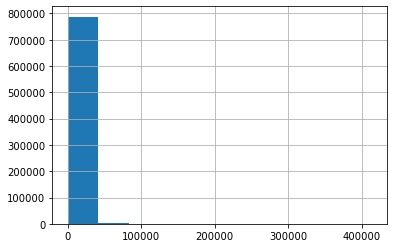

In [33]:
uscounties['cases'].hist()

# Create a new data frame for the total COVID deaths 

In [17]:
totaldeaths=uscounties.groupby('state')['deaths'].sum()

In [26]:
totaldeaths.head(55)

state
Alabama                      401910.0
Alaska                         8243.0
Arizona                      824704.0
Arkansas                     195657.0
California                  2419960.0
Colorado                     422228.0
Connecticut                  959370.0
Delaware                     121162.0
District of Columbia         125200.0
Florida                     2044443.0
Georgia                     1075158.0
Guam                           6978.0
Hawaii                        19306.0
Idaho                         73289.0
Illinois                    1750668.0
Indiana                      713866.0
Iowa                         238532.0
Kansas                       123026.0
Kentucky                     211072.0
Louisiana                    982417.0
Maine                         27577.0
Maryland                     758116.0
Massachusetts               1886796.0
Michigan                    1499973.0
Minnesota                    396094.0
Mississippi                  447426.0
Missou

# Total number of deaths

In [28]:
totaldeaths.sum()

37420164.0

In [34]:
totaldeaths.mean()

680366.6181818182

In [36]:
uscounties['deaths','date'].hist()

KeyError: ('deaths', 'date')